# Sample plotting code

In [164]:
import sys
sys.path.append('../')
from analysis_pipeline import *
py.rcParams['svg.fonttype'] = 'none'

In [2]:
a=load_analysis('/Users/nathanielnyema/Downloads/ip_cap_veh_7.npy')

recomputing...
successful


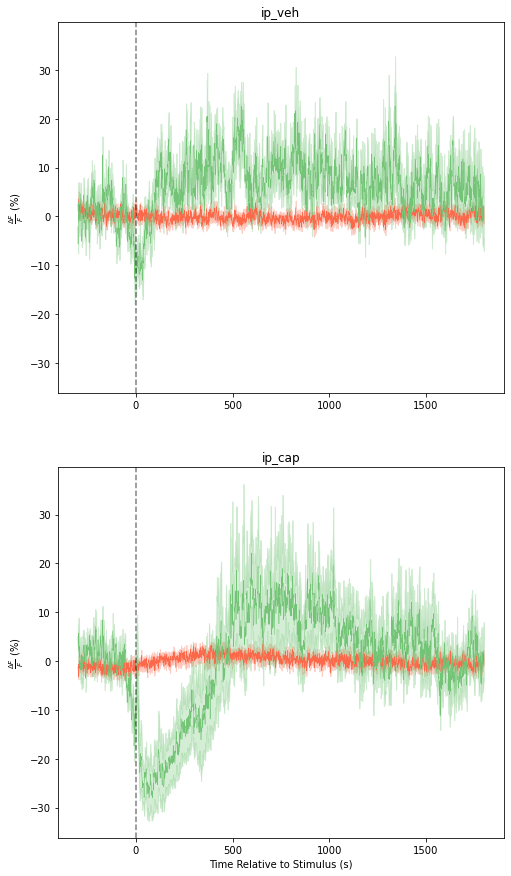

In [3]:
#by default we make a horizontal subplot but if you want
#to configure the subplot differently you can do so like this

_,ax=py.subplots(2,1,figsize=(8,15))
tmp=a.plot_both(ax=ax,show=False)
py.show()

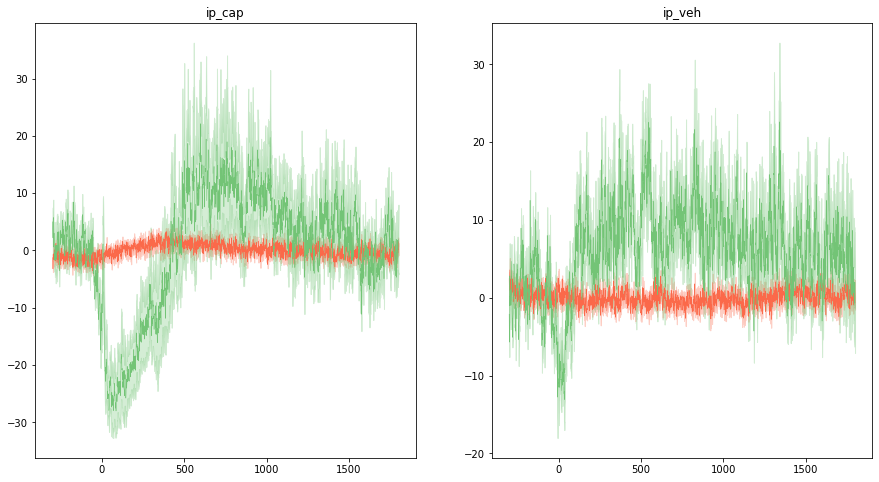

In [4]:
#if you want more control over which conditions appear on which axes you can try the following
_,ax=py.subplots(1,2,figsize=(15,8))

conds={'ip_cap':ax[0],
       'ip_veh':ax[1]}

for i in conds:
    a.plot_both(cond=i,ax=conds[i],show=False)
    conds[i].set_title(i)

py.show()

../analysis_pipeline.py:683: RuntimeWarning: invalid value encountered in double_scalars
  return np.trapz(y,x=y.index)/(y.index[-1]-y.index[0])
../analysis_pipeline.py:683: RuntimeWarning: invalid value encountered in double_scalars
  return np.trapz(y,x=y.index)/(y.index[-1]-y.index[0])


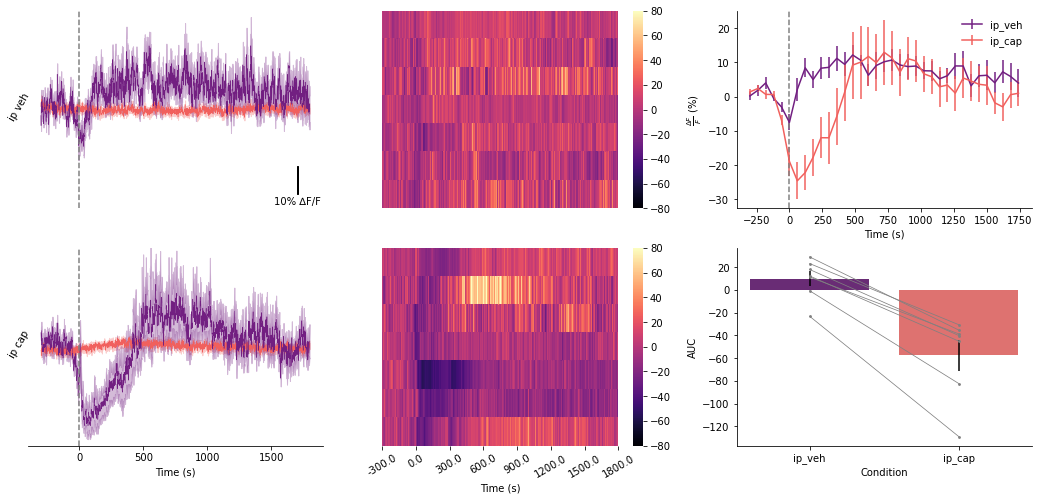

In [201]:
#Let's try putting together something we might want in a paper figure
#first we create the figure
fig=py.figure(figsize=(18,8))
cm='magma'
#plot 490 and 405 for ip_veh
ax=fig.add_subplot(231)
cp=sns.color_palette(cm,2)
a.plot_both(cond='ip_veh',c405=cp[1],c490=cp[0],show=False,ax=ax)
ax.axvline(0,linestyle='--',color='grey')
#set the spines and ticks to be invisible since we want to put a scale bar instead
py.setp(ax.spines.values(),visible=False)
ax.tick_params(left=False,bottom=False, labelleft=False,labelbottom=False)
ax.patch.set_visible(False)
ax.set_ylabel('ip veh',rotation=60)
ax.set_ylim(-35,35)

#add sclebar
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
vertbar = AnchoredSizeBar(ax.transData,
                           1, '10% ∆F/F', 'lower right', 
                           pad=.1,
                           color='black',
                           frameon=False,
                           size_vertical=10)
ax.add_artist(vertbar)


#plot 490 and 405 for ip_cap using similar steps
ax=fig.add_subplot(234)
a.plot_both(cond='ip_cap',c405=cp[1],c490=cp[0],show=False,ax=ax)
ax.axvline(0,linestyle='--',color='grey')
#set each spine invisible separately since we want to keep the x axis here
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(left=False, labelleft=False)
ax.patch.set_visible(False)
ax.set_ylabel('ip cap',rotation=60)
ax.set_xlabel('Time (s)')
ax.set_ylim(-35,35)

#heatmap for ip_veh
ax=fig.add_subplot(232)
sns.heatmap(100*a.all_490['ip_veh'].T,ax=ax,vmin=-80,vmax=80,cmap=cm)
ax.tick_params(left=False, bottom=False,labelbottom=False,labelleft=False)
ax.set_ylabel('')

#plot binned data
ax=fig.add_subplot(233)
a.bin_plot(60,ax=ax,show=False,cm=cm)
ax.axvline(0,linestyle='--',color='grey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Time (s)')
ax.patch.set_visible(False)
ax.legend(frameon=False)

#heatmap for ip_cap
ax=fig.add_subplot(235)
sns.heatmap(100*a.all_490['ip_cap'].T,ax=ax,xticklabels=300,vmin=-80,vmax=80,cmap=cm)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.tick_params(left=False, labelleft=False)
ax.set_ylabel('')
ax.set_xlabel('Time (s)')


#auc comparison for 
ax=fig.add_subplot(236)
df=a.bin_auc(0,300,pr=False)


#bar plot comparing auc between conditions
sns.barplot(data=df.reset_index(),y='AUC',x='cond',
            palette=cm,ci=None,ax=ax)

#plot individual lines for each mouse
sns.lineplot(data=df.reset_index(),y='AUC',x='cond',
             hue='mouse',palette=sns.color_palette(['grey'],a.n_tot),
             marker='o',mec='grey',ms=2,size=1,legend=False,ax=ax)

# Note seaborn only plots confidence intervals for error so we calculate standard error and plot it separately here
ax.errorbar(x=[0,1],y=df.groupby('cond').mean()['AUC'],
               yerr=df.groupby('cond').sem()['AUC'],ls='',color='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Condition')
ax.patch.set_visible(False)

py.show()

fig.savefig('example.svg')